In [1]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import pickle
from matplotlib import ticker
from scipy.stats import sem
from RZutilpy.figure import bar, plot, default_img_set, colorpalettable
from scipy.stats import ttest_rel
default_img_set()
import pingouin

In [2]:
with open('../Results/Metrics_All_Pre_Post.pkl', 'rb') as f:
    Metrics = pickle.load(f)
with open('../Results/ACC_curve.pkl', 'rb') as f:
    ACC = pickle.load(f)
alpha = 0.05

In [3]:
ACC_pre = ACC["ACC_pre"].mean(axis=(1,3))
ACC_post = ACC["ACC_post"].mean(axis=(1,3))
df_abs_pre = Metrics["df_abs_tp1"].mean(axis=(0,4))
df_abs_post = Metrics["df_abs_tp2"].mean(axis=(0,4))
variance_pre = Metrics["variance_median_tp1"].mean(axis=(0,4))
variance_post = Metrics["variance_median_tp2"].mean(axis=(0,4))
FanoFactor_pre = Metrics["FanoFactor_median_tp1"].mean(axis=(0,4))
FanoFactor_post = Metrics["FanoFactor_median_tp2"].mean(axis=(0,4))
NoiseCorrelation_pre = Metrics["NoiseCorrelation_median_tp1"].mean(axis=(0,4))
NoiseCorrelation_post = Metrics["NoiseCorrelation_median_tp2"].mean(axis=(0,4))
LFI_pre = Metrics["LFI_tp1"].mean(axis=(0,4)) * 16
LFI_post = Metrics["LFI_tp2"].mean(axis=(0,4)) * 16
rotation  = Metrics["rotation_tp1_tp2"].mean(axis=(0,4))
PCA_LFI = Metrics["PCA_LFI"].mean(axis=(0,4))
N_Neuron = Metrics['N_Neuron'].mean(axis=(0,4))
Decoding_pre = Metrics["Decoding_tp1"].mean(axis=(0,4))
Decoding_post = Metrics["Decoding_tp2"].mean(axis=(0,4))

In [4]:
sigstrength_mean = np.vstack((df_abs_pre.mean(axis=1).mean(axis=(0)),df_abs_post.mean(axis=1).mean(axis=(0)))).T
sigstrength_se = np.vstack((sem(df_abs_pre.mean(axis=1), axis=0),sem(df_abs_post.mean(axis=1), axis=0))).T
variance_mean = np.vstack((variance_pre.mean(axis=1).mean(axis=(0)),variance_post.mean(axis=1).mean(axis=(0)))).T
variance_se = np.vstack((sem(variance_pre.mean(axis=1), axis=0),sem(variance_post.mean(axis=1), axis=0))).T
rotation_mean = rotation.mean(axis=1).mean(axis=(0))
rotation_se = sem(rotation.mean(axis=1), axis=0)
FF_mean = np.vstack((FanoFactor_pre.mean(axis=1).mean(axis=(0)),FanoFactor_post.mean(axis=1).mean(axis=(0)))).T
FF_se = np.vstack((sem(FanoFactor_pre.mean(axis=1), axis=0),sem(FanoFactor_post.mean(axis=1), axis=0))).T
NC_mean = np.vstack((NoiseCorrelation_pre.mean(axis=1).mean(axis=(0)),NoiseCorrelation_post.mean(axis=1).mean(axis=(0)))).T
NC_se = np.vstack((sem(NoiseCorrelation_pre.mean(axis=1), axis=0),sem(NoiseCorrelation_post.mean(axis=1), axis=0))).T
LFI_mean = np.vstack((LFI_pre.mean(axis=1).mean(axis=(0)),LFI_post.mean(axis=1).mean(axis=(0)))).T
LFI_se = np.vstack((sem(LFI_pre.mean(axis=1), axis=0),sem(LFI_post.mean(axis=1), axis=0))).T
Decoding_mean = np.vstack((Decoding_pre.mean(axis=1).mean(axis=(0)),Decoding_post.mean(axis=1).mean(axis=(0)))).T
Decoding_se = np.vstack((sem(Decoding_pre.mean(axis=1), axis=0),sem(Decoding_post.mean(axis=1), axis=0))).T
PCA_LFI_mean = PCA_LFI.mean(axis=1).mean(axis=(0))
PCA_LFI_se = sem(PCA_LFI.mean(axis=1),axis=0)

ACC_pre_mean = ACC_pre.mean(axis=0)
ACC_pre_se = sem(ACC_pre, axis=0)
ACC_post_mean = ACC_post.mean(axis=0)
ACC_post_se = sem(ACC_post, axis=0)

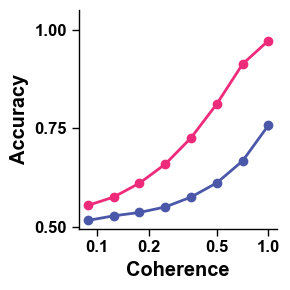

In [5]:
ryzcolor = colorpalettable('ryz1')

C0, C1=np.array(ryzcolor(0)), np.array(ryzcolor(1))
C0_alpha, C1_alpha=np.array(ryzcolor(0)), np.array(ryzcolor(1))
C0_alpha[-1]=0.3
C1_alpha[-1]=0.3

fig, ax = plt.subplots(1, 1, figsize=(3, 3))
plt.sca(ax)
plot(np.array([0.0884, 0.1250, 0.1768, 0.2500, 0.3536, 0.5000, 0.7071, 1]), ACC_pre_mean.T, yerr=ACC_pre_se, fmt='-o', color=ryzcolor(0), label="Pre")
plot(np.array([0.0884, 0.1250, 0.1768, 0.2500, 0.3536, 0.5000, 0.7071, 1]), ACC_post_mean.T, yerr=ACC_post_se, fmt='-o', color=ryzcolor(1), label="Post")
ax.set_xlabel('Coherence')
ax.set_ylabel('Accuracy')
ax.set_xscale("log")
ax.set_ylim([0.495,1.05])
ax.set_yticks([0.50,0.75,1.00])
ax.set_xticks([0.1, 0.2, 0.5, 1.0])
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}"))
ax.minorticks_off()

# plt.savefig('Fig5_1.pdf')

2
2


C:\Users\yuang\AppData\Local\Temp\ipykernel_293108\239169145.py:23: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim([0,100])


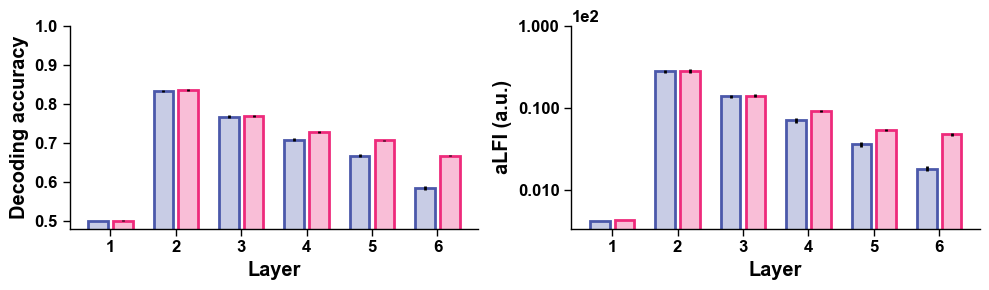

In [6]:
ryzcolor=colorpalettable('ryz1')
C0, C1=np.array(ryzcolor(0)), np.array(ryzcolor(1))
C0_alpha, C1_alpha=np.array(ryzcolor(0)), np.array(ryzcolor(1))
C0_alpha[-1]=0.3
C1_alpha[-1]=0.3

fig, ax = plt.subplots(1, 2, figsize=(10, 3))

# Decoding
plt.sca(ax[0])
bar(np.arange(1, 7, 1), Decoding_mean, yerr=Decoding_se, bargap=0.08, ecolor='k', width=0.3, color=[C0_alpha, C1_alpha], edgecolor=[C0, C1],
    linewidth=2)
ax[0].set_xticks([1, 2, 3, 4, 5, 6])
ax[0].set_xlabel("Layer")
ax[0].set_ylabel('Decoding accuracy')
ax[0].set_ylim([0.48,1.0])
ax[0].minorticks_off()

# LFI
plt.sca(ax[1])
bar(np.arange(1, 7, 1), LFI_mean, yerr=LFI_se, ecolor='k', bargap=0.08, width=0.3, color=[C0_alpha, C1_alpha], edgecolor=[C0, C1], linewidth=2)
ax[1].set_yscale("log")
ax[1].set_ylim([0,100])
ax[1].set_xticks([1, 2, 3, 4, 5, 6])
ax[1].set_xlabel("Layer")
ax[1].set_ylabel('aLFI (a.u.)')
ax[1].minorticks_off()
ax[1].yaxis.set_major_formatter(plt.ScalarFormatter())
ax[1].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# plt.savefig('Fig5_2.pdf')

In [8]:
np.set_printoptions(suppress=True)
print(ttest_rel((LFI_pre).mean(axis=1), (LFI_post).mean(axis=1),alternative='less'))
print(ttest_rel((Decoding_pre).mean(axis=1), (Decoding_post).mean(axis=1),alternative='less'))

print(ttest_rel((FanoFactor_pre).mean(axis=1)[:, -1], (FanoFactor_post).mean(axis=1)[:, -1],alternative='greater'))
print(ttest_rel((NoiseCorrelation_pre).mean(axis=1)[:, -1], (NoiseCorrelation_post).mean(axis=1)[:, -1],alternative='greater'))
print(ttest_rel((df_abs_pre).mean(axis=1)[:, -1], (df_abs_post).mean(axis=1)[:, -1],alternative='less'))
print(ttest_rel((variance_pre).mean(axis=1)[:, -1], (variance_post).mean(axis=1)[:, -1],alternative='greater'))

# compute the effect size for the last 4 metrics
print(pingouin.compute_effsize(df_abs_pre.mean(axis=1)[:, -1], df_abs_post.mean(axis=1)[:, -1], eftype='cohen'))
print(pingouin.compute_effsize(variance_pre.mean(axis=1)[:, -1], variance_post.mean(axis=1)[:, -1], eftype='cohen'))
print(pingouin.compute_effsize(FanoFactor_pre.mean(axis=1)[:, -1], FanoFactor_post.mean(axis=1)[:, -1], eftype='cohen'))
print(pingouin.compute_effsize(NoiseCorrelation_pre.mean(axis=1)[:, -1], NoiseCorrelation_post.mean(axis=1)[:, -1], eftype='cohen'))


TtestResult(statistic=array([ -2.42939541,  -3.20565723,  -1.04507334,  -7.22484474,
       -13.5879343 , -26.30193686]), pvalue=array([0.04669024, 0.02455946, 0.18639066, 0.00273392, 0.0004311 ,
       0.00006029]), df=array([3, 3, 3, 3, 3, 3]))
TtestResult(statistic=array([ -1.19539659,  -2.07576262,  -3.08288734,  -7.14323823,
        -9.34741188, -20.66639856]), pvalue=array([0.15890544, 0.06476306, 0.02700679, 0.00282444, 0.00129645,
       0.00012388]), df=array([3, 3, 3, 3, 3, 3]))
TtestResult(statistic=57.57867362097192, pvalue=5.770114002130317e-06, df=3)
TtestResult(statistic=42.839964469025894, pvalue=1.399723326649013e-05, df=3)
TtestResult(statistic=-0.9873657214580515, pvalue=0.19812976105521127, df=3)
TtestResult(statistic=59.056265314502525, pvalue=5.348040771218247e-06, df=3)
-0.18878150241861696
43.889314227484284
38.75121998097947
2.192525780249157


2
2
2
2
1


Text(0, 0.5, 'Signal rotation angle (°)')

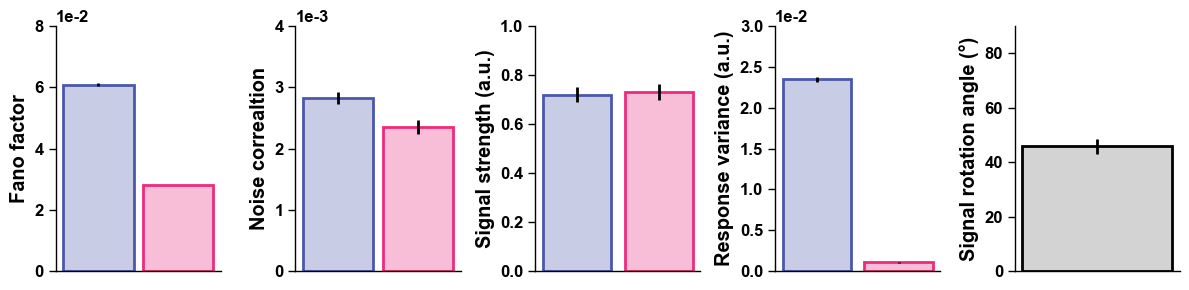

In [8]:
fig, ax = plt.subplots(1, 5, figsize=(12, 3))

# Fano Factor
plt.sca(ax[0])
bar(np.arange(1), FF_mean[-1:], yerr=FF_se[-1:], ecolor='k', bargap=0.04, width=0.3, color=[C0_alpha, C1_alpha],edgecolor=[C0, C1], linewidth=2)
ax[0].set_xticks([])
ax[0].set_ylim([0, 0.08])
ax[0].set_ylabel('Fano factor')
ax[0].yaxis.set_major_formatter(plt.ScalarFormatter())
ax[0].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Noise Correlation
plt.sca(ax[1])
bar(np.arange(1), NC_mean[-1:], yerr=NC_se[-1:], ecolor='k', bargap=0.04, width=0.3, color=[C0_alpha, C1_alpha], edgecolor=[C0, C1], linewidth=2)
ax[1].set_xticks([])
ax[1].set_ylim([0, 4e-3])
ax[1].set_ylabel('Noise correaltion')
ax[1].yaxis.set_major_formatter(plt.ScalarFormatter())
ax[1].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Signal strength
plt.sca(ax[2])
bar(np.arange(1), sigstrength_mean[-1:],
    yerr=sigstrength_se[-1:], ecolor='k', bargap=0.04, width=0.2, color=[C0_alpha, C1_alpha],edgecolor=[C0, C1], linewidth=2)
ax[2].set_ylim([0, 1])
ax[2].set_xticks([])
ax[2].set_ylabel('Signal strength (a.u.)')

# Variance
plt.sca(ax[3])
bar(np.arange(1), variance_mean[-1:], yerr=variance_se[-1:], ecolor='k', bargap=0.04, width=0.2, color=[C0_alpha, C1_alpha],edgecolor=[C0, C1], linewidth=2)
ax[3].set_xticks([])
ax[3].set_ylim([0, 0.03])
ax[3].set_ylabel('Response variance (a.u.)')
ax[3].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Signal rotation angle
plt.sca(ax[4])
bar(np.arange(1), rotation_mean[-1:], yerr=rotation_se[-1:], width=0.01, edgecolor='k', facecolor='lightgray', linewidth=2)
ax[4].set_xticks([])
ax[4].set_ylim([0, 90])
ax[4].set_ylabel('Signal rotation angle (°)')

In [9]:
np.set_printoptions(suppress=True)
_,p = ttest_rel((PCA_LFI[:,:,:,0]).mean(axis=1), (PCA_LFI[:,:,:,1]).mean(axis=1),axis=0, alternative='less')
print(p)
_,p = ttest_rel((PCA_LFI[:,:,:,1]).mean(axis=1), (PCA_LFI[:,:,:,2]).mean(axis=1),axis=0, alternative='less')
print(p)
_,p = ttest_rel((PCA_LFI[:,:,:,2]).mean(axis=1), (PCA_LFI[:,:,:,3]).mean(axis=1),axis=0, alternative='greater')
print(p)


[0.00098664 0.00039625 0.02895595 0.00048845 0.00000085 0.00000251]
[0.00336092 0.04614533 0.00218248 0.00179922 0.00022232 0.01603138]
[0.00012285 0.00193637 0.00866154 0.00300161 0.0001612  0.00019758]


4


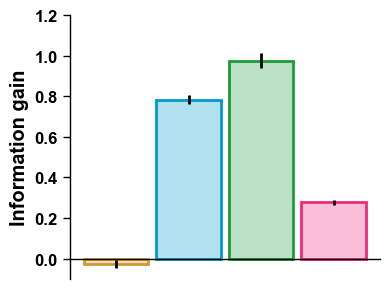

In [10]:
ryzcolor = colorpalettable('ryz1')
C0, C1, C0_alpha, C1_alpha = np.array(ryzcolor(0)), np.array(ryzcolor(1)),np.array(ryzcolor(0)), np.array(ryzcolor(1))
C0_alpha[-1] = 0.3
C1_alpha[-1] = 0.3
Clist = [np.array(ryzcolor(2)), np.array(ryzcolor(3)), np.array([0.121, 0.6039, 0.227]), np.array(ryzcolor(1))]
Calphalist = [np.array(ryzcolor(2)), np.array(ryzcolor(3)), np.array([0.121, 0.6039, 0.227, 1.0]), np.array(ryzcolor(1))]
Calphalist[0][-1]=0.3
Calphalist[1][-1]=0.3
Calphalist[2][-1]=0.3
Calphalist[3][-1]=0.3

fig, ax = plt.subplots(1,1,figsize=(4, 3))
patch,_= bar(1,PCA_LFI_mean[-1:,:], yerr=PCA_LFI_se[-1:,:], bargap=0.03, ecolor='k', axes=ax, color=Calphalist, edgecolor=Clist, linewidth=2)
ax.set_ylabel('Information gain')
ax.set_ylim([-0.1, 1.2])
ax.set_xticks([])
ax.spines['bottom'].set_position(('data', 0))
#plt.savefig('Fig5_4.pdf')

In [11]:
i_layer = 5
PC_abs_pre_mean = np.mean(np.mean(np.array(Metrics['PC_abs_pre'][:,:,:, i_layer,:].tolist()),axis=(0,2,3)), axis=0)
PC_abs_post_mean = np.mean(np.mean(np.array(Metrics['PC_abs_post'][:,:,:, i_layer,:].tolist()),axis=(0,2,3)), axis=0)
PCA_rotation_mean = np.mean(np.mean(np.array(Metrics['PCA_rotation'][:,:,:, i_layer,:].tolist()),axis=(0,2,3)), axis=0)
PC_abs_pre_se = sem(np.mean(np.array(Metrics['PC_abs_pre'][:,:,:, i_layer,:].tolist()),axis=(0,2,3)), axis=0)
PC_abs_post_se = sem(np.mean(np.array(Metrics['PC_abs_pre'][:,:,:, i_layer,:].tolist()),axis=(0,2,3)), axis=0)
PCA_rotation_se = sem(np.mean(np.array(Metrics['PC_abs_pre'][:,:,:, i_layer,:].tolist()),axis=(0,2,3)), axis=0)

tmp = np.cumsum(PC_abs_pre_mean)/np.sum(PC_abs_pre_mean)
tmp = np.cumsum(PC_abs_post_mean)/np.sum(PC_abs_post_mean)

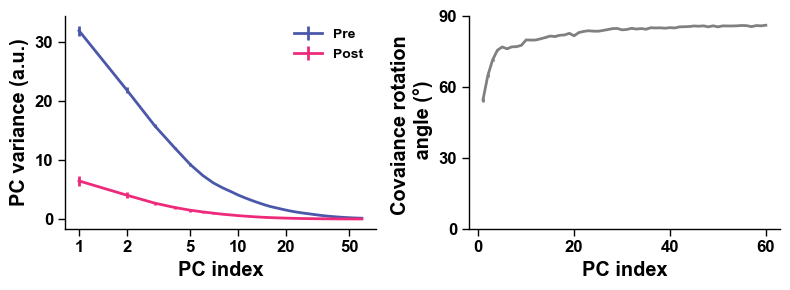

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))

plt.sca(ax[0])
plot(np.arange(1,61), PC_abs_pre_mean[:60].T, PC_abs_pre_se[:60].T, color=ryzcolor(0), label="Pre")
plot(np.arange(1,61), PC_abs_post_mean[:60].T, PC_abs_post_se[:60].T, color=ryzcolor(1), label="Post")
ax[0].set_ylabel('PC variance (a.u.)')
ax[0].set_xlabel('PC index')
ax[0].set_xscale("log")
xticks=[1, 2, 5, 10, 20, 50]
ax[0].set_xticks(xticks)
ax[0].set_xticklabels([str(i) for i in xticks])
ax[0].legend(loc = "upper right")
ax[0].minorticks_off()


plt.sca(ax[1])
plot(np.arange(1,61), PCA_rotation_mean[:60].T, PCA_rotation_se[:60].T, color='gray')
ax[1].set_ylabel('Covaiance rotation \n angle (°)')
ax[1].set_xlabel('PC index')
ax[1].set_ylim([0, 90])
ax[1].set_yticks([0, 30, 60, 90])

# plt.savefig('Fig5_5.pdf')